# Histology Tissue Classification Project (HTCP)

(C) K. Mader / U. Michelucci 2018-2019

# Overview
The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge
- Classify tiles correctly into one of the eight classes
- Which classes are most frequently confused?
- What features can be used (like texture, see scikit-image) to improve classification?
- How can these models be applied to the much larger 5000x5000 models? 
How can this be done efficiently?

# Acknowledgements
The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, 
    Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels 
providing basic analysis of the data

Content
This data set represents a collection of textures in histological images of 
human colorectal cancer. It contains two files:

    Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
    histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
    to exactly one of eight tissue categories (specified by the folder name). 
    
    Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
    larger histological images of 5000 x 5000 px each. These images contain 
    more than one tissue type. Image format

All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015

# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on  kaggle: https://goo.gl/hkRSke  

# Helper Functions

In [1]:
def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

In [2]:
def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load the data

In [3]:
%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import *

In [4]:
data = pd.read_csv('data/HTCP_28_28_L.csv')

Let's create an array with labels (not yet one-encoded) and one for the images.

In [5]:
yinput = data['label']
Xinput = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [6]:
Xinput.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


In [7]:
yinput.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

The datasets has 5000 images, each 28x28 in gray

In [8]:
Xinput.shape

(5000, 784)

In [9]:
yinput.shape

(5000,)

## Examples of each class

Let's plot an image of each class

In [10]:
yinput.unique()

array([2, 5, 7, 6, 8, 1, 4, 3], dtype=int64)

In [11]:
def get_random_element_with_label (Xinput, lbls, lbl):
    tmp = lbls == lbl
    subset = Xinput[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(Xinput, yinput, i)
    labels_overview[i,:] = img

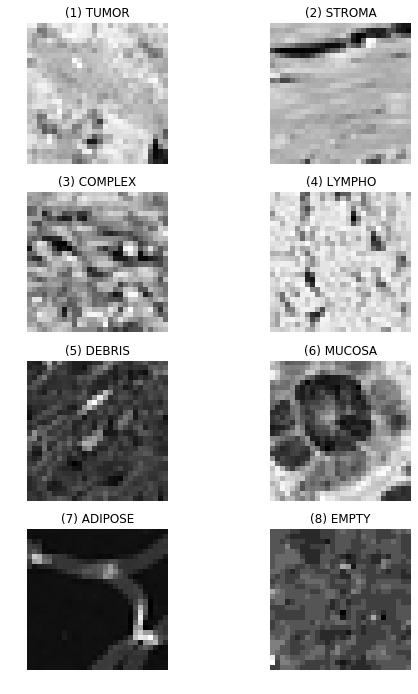

In [12]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

In [13]:
total = 0
for i in range(9):
    print ("image", i, "appear", np.count_nonzero(yinput == i), "times")

image 0 appear 0 times
image 1 appear 625 times
image 2 appear 625 times
image 3 appear 625 times
image 4 appear 625 times
image 5 appear 625 times
image 6 appear 625 times
image 7 appear 625 times
image 8 appear 625 times


In [14]:
total = 0
for i in range(9):
    print ("image", i, "makes", np.around(np.count_nonzero(yinput == i)/5000.0*100.0, decimals=1), "% of the 5000 observations")

image 0 makes 0.0 % of the 5000 observations
image 1 makes 12.5 % of the 5000 observations
image 2 makes 12.5 % of the 5000 observations
image 3 makes 12.5 % of the 5000 observations
image 4 makes 12.5 % of the 5000 observations
image 5 makes 12.5 % of the 5000 observations
image 6 makes 12.5 % of the 5000 observations
image 7 makes 12.5 % of the 5000 observations
image 8 makes 12.5 % of the 5000 observations


In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ylabels, ylabels_test = train_test_split(Xinput, yinput, test_size=0.2, stratify=yinput, random_state=2018)

In [16]:
train = xtrain.transpose()
labels = ylabels.values.reshape(1, 4000)-1
labels_ = np.zeros((4000, 9))
labels_[np.arange(4000), labels] = 1
labels_ = labels_.transpose()

In [17]:
print(train.shape)
print(labels_.shape)

(784, 4000)
(9, 4000)


In [18]:
test = xtest.transpose()
labels_test = ylabels_test.values.reshape(1, 1000)-1
labels_test_ = np.zeros((1000, 9))
labels_test_[np.arange(1000), labels_test] = 1
labels_test_ = labels_test_.transpose()

In [19]:
print(labels_test_.shape)
print(test.shape)

(9, 1000)
(784, 1000)


## Normalization

In [20]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

In [21]:
import tensorflow as tf

## Function to create a layer

In [22]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2.0 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z)

In [23]:
tf.reset_default_graph() 

n_dim = 784
n1 = 1
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
outputs = create_layer (hidden1, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
def model(minibatch_size, training_epochs, features, classes, logging_step, learning_r):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            sess.run(optimizer, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

In [25]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.921898
Reached epoch 10 cost J = 0.9218837
Reached epoch 20 cost J = 0.92188066
Reached epoch 30 cost J = 0.9218765
Reached epoch 40 cost J = 0.92187935
Reached epoch 50 cost J = 0.9218688
Reached epoch 60 cost J = 0.92186815
Reached epoch 70 cost J = 0.92187107
Reached epoch 80 cost J = 0.92186695
Reached epoch 90 cost J = 0.9218663
Reached epoch 100 cost J = 0.9218659


In [26]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.1255


In [27]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.122


In [28]:
tf.reset_default_graph() 

n_dim = 784
n1 = 10
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
outputs = create_layer (hidden1, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [30]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.91814214
Reached epoch 10 cost J = 0.9130484
Reached epoch 20 cost J = 0.90429145
Reached epoch 30 cost J = 0.89235544
Reached epoch 40 cost J = 0.875968
Reached epoch 50 cost J = 0.8653745
Reached epoch 60 cost J = 0.86185783
Reached epoch 70 cost J = 0.8607548
Reached epoch 80 cost J = 0.8600594
Reached epoch 90 cost J = 0.8595013
Reached epoch 100 cost J = 0.8590235


In [31]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.43375


In [32]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.458


In [33]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
outputs = create_layer (hidden1, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [34]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [35]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.88213694
Reached epoch 10 cost J = 0.86138314
Reached epoch 20 cost J = 0.8587065
Reached epoch 30 cost J = 0.8572795
Reached epoch 40 cost J = 0.8559947
Reached epoch 50 cost J = 0.8549667
Reached epoch 60 cost J = 0.85402477
Reached epoch 70 cost J = 0.8531675
Reached epoch 80 cost J = 0.85234904
Reached epoch 90 cost J = 0.85155207
Reached epoch 100 cost J = 0.8507872


In [36]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.495


In [37]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.486


In [38]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
outputs = create_layer (hidden2, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [39]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [40]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8798094
Reached epoch 10 cost J = 0.8588091
Reached epoch 20 cost J = 0.8558181
Reached epoch 30 cost J = 0.8535606
Reached epoch 40 cost J = 0.8516248
Reached epoch 50 cost J = 0.8500153
Reached epoch 60 cost J = 0.848438
Reached epoch 70 cost J = 0.8470039
Reached epoch 80 cost J = 0.8456037
Reached epoch 90 cost J = 0.84426475
Reached epoch 100 cost J = 0.84296864


In [41]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.56075


In [42]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.521


In [43]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
outputs = create_layer (hidden3, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [44]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [45]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8769517
Reached epoch 10 cost J = 0.85631067
Reached epoch 20 cost J = 0.8524396
Reached epoch 30 cost J = 0.8493704
Reached epoch 40 cost J = 0.84667754
Reached epoch 50 cost J = 0.8437507
Reached epoch 60 cost J = 0.8412174
Reached epoch 70 cost J = 0.8389037
Reached epoch 80 cost J = 0.8366804
Reached epoch 90 cost J = 0.83456475
Reached epoch 100 cost J = 0.8325917


In [46]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.564


In [47]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.499


In [48]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
outputs = create_layer (hidden4, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [49]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [50]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.880123
Reached epoch 10 cost J = 0.85251456
Reached epoch 20 cost J = 0.8461901
Reached epoch 30 cost J = 0.8415564
Reached epoch 40 cost J = 0.8377927
Reached epoch 50 cost J = 0.8343957
Reached epoch 60 cost J = 0.83129907
Reached epoch 70 cost J = 0.8283682
Reached epoch 80 cost J = 0.82591236
Reached epoch 90 cost J = 0.82329816
Reached epoch 100 cost J = 0.8206604


In [51]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.606


In [52]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.532


In [53]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
outputs = create_layer (hidden5, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [54]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [55]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.88108623
Reached epoch 10 cost J = 0.8469151
Reached epoch 20 cost J = 0.839577
Reached epoch 30 cost J = 0.8344778
Reached epoch 40 cost J = 0.8302699
Reached epoch 50 cost J = 0.8264307
Reached epoch 60 cost J = 0.8228536
Reached epoch 70 cost J = 0.81965864
Reached epoch 80 cost J = 0.8162962
Reached epoch 90 cost J = 0.8131236
Reached epoch 100 cost J = 0.80996543


In [56]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.62225


In [57]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.527


In [58]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
outputs = create_layer (hidden6, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [59]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [60]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8697267
Reached epoch 10 cost J = 0.84070563
Reached epoch 20 cost J = 0.832029
Reached epoch 30 cost J = 0.8256475
Reached epoch 40 cost J = 0.8204895
Reached epoch 50 cost J = 0.8158241
Reached epoch 60 cost J = 0.81183505
Reached epoch 70 cost J = 0.80793846
Reached epoch 80 cost J = 0.80424124
Reached epoch 90 cost J = 0.8007677
Reached epoch 100 cost J = 0.79774916


In [61]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.66575


In [62]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.554


In [63]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
outputs = create_layer (hidden7, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [64]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [65]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8788114
Reached epoch 10 cost J = 0.8372245
Reached epoch 20 cost J = 0.8272937
Reached epoch 30 cost J = 0.8201562
Reached epoch 40 cost J = 0.8144395
Reached epoch 50 cost J = 0.8089774
Reached epoch 60 cost J = 0.8042155
Reached epoch 70 cost J = 0.7995114
Reached epoch 80 cost J = 0.79644173
Reached epoch 90 cost J = 0.7933429
Reached epoch 100 cost J = 0.7892767


In [66]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.7055


In [67]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.559


In [68]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
outputs = create_layer (hidden8, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [69]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [70]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8722962
Reached epoch 10 cost J = 0.8307382
Reached epoch 20 cost J = 0.8197933
Reached epoch 30 cost J = 0.81185013
Reached epoch 40 cost J = 0.8048854
Reached epoch 50 cost J = 0.79906356
Reached epoch 60 cost J = 0.7941305
Reached epoch 70 cost J = 0.7896292
Reached epoch 80 cost J = 0.7856241
Reached epoch 90 cost J = 0.78322375
Reached epoch 100 cost J = 0.77954096


In [71]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.71775


In [72]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.537


In [73]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
outputs = create_layer (hidden9, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [74]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [75]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8586747
Reached epoch 10 cost J = 0.8284607
Reached epoch 20 cost J = 0.8167052
Reached epoch 30 cost J = 0.80947244
Reached epoch 40 cost J = 0.8024289
Reached epoch 50 cost J = 0.79842967
Reached epoch 60 cost J = 0.79390264
Reached epoch 70 cost J = 0.79199606
Reached epoch 80 cost J = 0.7861709
Reached epoch 90 cost J = 0.78324246
Reached epoch 100 cost J = 0.7816606


In [76]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.73475


In [77]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.519


In [78]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
outputs = create_layer (hidden10, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [79]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [80]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8685723
Reached epoch 10 cost J = 0.82572806
Reached epoch 20 cost J = 0.8133874
Reached epoch 30 cost J = 0.8045881
Reached epoch 40 cost J = 0.79823804
Reached epoch 50 cost J = 0.79197687
Reached epoch 60 cost J = 0.7884622
Reached epoch 70 cost J = 0.78344536
Reached epoch 80 cost J = 0.78053504
Reached epoch 90 cost J = 0.77544326
Reached epoch 100 cost J = 0.773525


In [81]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.75675


In [82]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.51


In [83]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
outputs = create_layer (hidden11, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [84]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [85]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.860754
Reached epoch 10 cost J = 0.82153344
Reached epoch 20 cost J = 0.81092453
Reached epoch 30 cost J = 0.80346847
Reached epoch 40 cost J = 0.7978005
Reached epoch 50 cost J = 0.792181
Reached epoch 60 cost J = 0.7880161
Reached epoch 70 cost J = 0.7831659
Reached epoch 80 cost J = 0.7798553
Reached epoch 90 cost J = 0.77669
Reached epoch 100 cost J = 0.772399


In [86]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.7715


In [87]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.525


In [88]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
outputs = create_layer (hidden12, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [89]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [90]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8676177
Reached epoch 10 cost J = 0.8206233
Reached epoch 20 cost J = 0.80955595
Reached epoch 30 cost J = 0.8007181
Reached epoch 40 cost J = 0.7951066
Reached epoch 50 cost J = 0.7892435
Reached epoch 60 cost J = 0.7844526
Reached epoch 70 cost J = 0.77950627
Reached epoch 80 cost J = 0.7772491
Reached epoch 90 cost J = 0.77260447
Reached epoch 100 cost J = 0.7720884


In [91]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.77525


In [92]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.51


In [93]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n13 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
hidden13 = create_layer (hidden12, n13, activation = tf.nn.relu)
outputs = create_layer (hidden13, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [94]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [95]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8568012
Reached epoch 10 cost J = 0.8209378
Reached epoch 20 cost J = 0.81051606
Reached epoch 30 cost J = 0.80157924
Reached epoch 40 cost J = 0.7942925
Reached epoch 50 cost J = 0.7944915
Reached epoch 60 cost J = 0.78936976
Reached epoch 70 cost J = 0.78043634
Reached epoch 80 cost J = 0.7776817
Reached epoch 90 cost J = 0.7736091
Reached epoch 100 cost J = 0.7761906


In [96]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.73125


In [97]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.484


In [98]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n13 = 100
n14 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
hidden13 = create_layer (hidden12, n13, activation = tf.nn.relu)
hidden14 = create_layer (hidden13, n14, activation = tf.nn.relu)
outputs = create_layer (hidden14, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [99]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [100]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8619158
Reached epoch 10 cost J = 0.8216425
Reached epoch 20 cost J = 0.81033516
Reached epoch 30 cost J = 0.80214745
Reached epoch 40 cost J = 0.7945472
Reached epoch 50 cost J = 0.79141074
Reached epoch 60 cost J = 0.78622836
Reached epoch 70 cost J = 0.7802055
Reached epoch 80 cost J = 0.7786621
Reached epoch 90 cost J = 0.77537364
Reached epoch 100 cost J = 0.77441156


In [101]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.77325


In [102]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.534


In [103]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n13 = 100
n14 = 100
n15 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
hidden13 = create_layer (hidden12, n13, activation = tf.nn.relu)
hidden14 = create_layer (hidden13, n14, activation = tf.nn.relu)
hidden15 = create_layer (hidden14, n15, activation = tf.nn.relu)
outputs = create_layer (hidden15, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [104]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [105]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.85862225
Reached epoch 10 cost J = 0.8221298
Reached epoch 20 cost J = 0.8143471
Reached epoch 30 cost J = 0.80220073
Reached epoch 40 cost J = 0.79877335
Reached epoch 50 cost J = 0.7910806
Reached epoch 60 cost J = 0.7867185
Reached epoch 70 cost J = 0.7878935
Reached epoch 80 cost J = 0.7760061
Reached epoch 90 cost J = 0.77999324
Reached epoch 100 cost J = 0.77483517


In [106]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.745


In [107]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.52


In [108]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n13 = 100
n14 = 100
n15 = 100
n16 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
hidden13 = create_layer (hidden12, n13, activation = tf.nn.relu)
hidden14 = create_layer (hidden13, n14, activation = tf.nn.relu)
hidden15 = create_layer (hidden14, n15, activation = tf.nn.relu)
hidden16 = create_layer (hidden15, n16, activation = tf.nn.relu)
outputs = create_layer (hidden16, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [109]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [110]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = 0.8581884
Reached epoch 10 cost J = 0.8294467
Reached epoch 20 cost J = 0.8167777
Reached epoch 30 cost J = 0.8057739
Reached epoch 40 cost J = 0.8085398
Reached epoch 50 cost J = 0.7929648
Reached epoch 60 cost J = 0.787377
Reached epoch 70 cost J = 0.7843435
Reached epoch 80 cost J = 0.7898599
Reached epoch 90 cost J = 0.78348035
Reached epoch 100 cost J = 0.7807209


In [111]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.707


In [112]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.484


In [113]:
tf.reset_default_graph() 

n_dim = 784
n1 = 100
n2 = 100
n3 = 100
n4 = 100
n5 = 100
n6 = 100
n7 = 100
n8 = 100
n9 = 100
n10 = 100
n11 = 100
n12 = 100
n13 = 100
n14 = 100
n15 = 100
n16 = 100
n17 = 100
n_outputs = 9

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [9, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden5 = create_layer (hidden4, n5, activation = tf.nn.relu)
hidden6 = create_layer (hidden5, n6, activation = tf.nn.relu)
hidden7 = create_layer (hidden6, n7, activation = tf.nn.relu)
hidden8 = create_layer (hidden7, n8, activation = tf.nn.relu)
hidden9 = create_layer (hidden8, n9, activation = tf.nn.relu)
hidden10 = create_layer (hidden9, n10, activation = tf.nn.relu)
hidden11 = create_layer (hidden10, n11, activation = tf.nn.relu)
hidden12 = create_layer (hidden11, n12, activation = tf.nn.relu)
hidden13 = create_layer (hidden12, n13, activation = tf.nn.relu)
hidden14 = create_layer (hidden13, n14, activation = tf.nn.relu)
hidden15 = create_layer (hidden14, n15, activation = tf.nn.relu)
hidden16 = create_layer (hidden15, n16, activation = tf.nn.relu)
hidden17 = create_layer (hidden16, n17, activation = tf.nn.relu)
outputs = create_layer (hidden17, n_outputs, activation = tf.identity)
y_ = tf.nn.softmax(outputs)

cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [114]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step, 
                 learning_r, number_neurons, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [115]:
sess, cost_history = model (50, 100, train, labels_,logging_step = 10, learning_r = 0.01)

Reached epoch 0 cost J = nan
Reached epoch 10 cost J = nan
Reached epoch 20 cost J = nan
Reached epoch 30 cost J = nan
Reached epoch 40 cost J = nan
Reached epoch 50 cost J = nan
Reached epoch 60 cost J = nan
Reached epoch 70 cost J = nan
Reached epoch 80 cost J = nan
Reached epoch 90 cost J = nan
Reached epoch 100 cost J = nan


In [116]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess))

Accuracy: 0.0


In [117]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess))

Accuracy: 0.0
